In [ ]:
"""
Luther Challenges

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)
Just getting started? Read this guide: 10 minutes to pandas
Data: Your own data! But: if you don't have movie data to work on yet, 
you can use some data on the top grossing 100 movies from 2013, 
scraped from Box Office Mojo: 2013_movies.csv

Challenge 1
Plot domestic total gross over time

Challenge 2
Plot runtime vs domestic total gross

Challenge 3
Group your data by Rating and find the average runtime and 
domestic total gross at each level of Rating

Challenge 4
Make one figure with (N=the number of MPAA ratings there are) 
subplots, and in each plot the release date vs the domestic total gross

Challenge 5
What director in your dataset has the highest gross per movie?

Challenge 6

Bin your dataset into years (if applicable) and make a bar graph 
with error bars of gross each year
"""

In [116]:
# Challenge 1
# Plot domestic total gross over time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

df = pd.read_csv('2013_movies.csv')
# df.describe()
df.head()


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


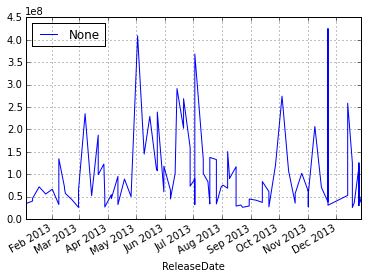

In [128]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df2 = df.sort(['ReleaseDate'])

df2.plot(x='ReleaseDate', y='DomesticTotalGross')

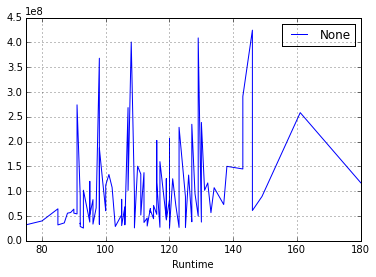

In [84]:
# Challenge 2
# Plot runtime vs domestic total gross
df2 = df.sort(['Runtime'])
df2.plot(x='Runtime', y='DomesticTotalGross')


In [164]:
# Challenge 3
# Group your data by Rating and find the average runtime and 
# domestic total gross at each level of Rating
df_subset = df[['Rating','DomesticTotalGross']]
print df_subset.groupby(['Rating'], sort=False).sum()
print "\n"
print df_subset.groupby(['Rating'], sort=False).mean()

        DomesticTotalGross
Rating                    
PG-13           5238139144
PG              1967035741
G                268492764
R               2586019873


        DomesticTotalGross
Rating                    
PG-13            111449769
PG               131135716
G                268492764
R                 69892429


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Rating
G        [Axes(0.125,0.125;0.775x0.775)]
PG       [Axes(0.125,0.125;0.775x0.775)]
PG-13    [Axes(0.125,0.125;0.775x0.775)]
R        [Axes(0.125,0.125;0.775x0.775)]
dtype: object

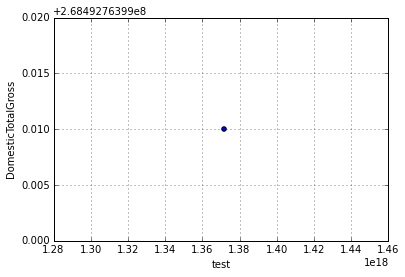

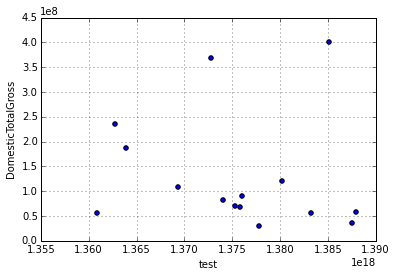

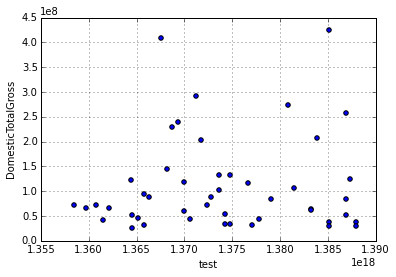

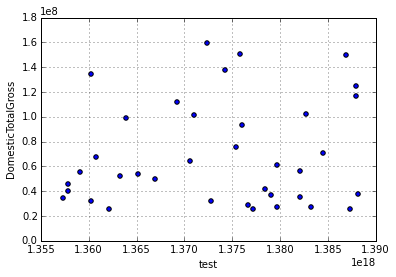

In [136]:
# Challenge 4
# Make one figure with (N=the number of MPAA ratings there are) 
# subplots, and in each plot the release date vs the domestic total gross
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df2 = df.sort(['Rating','ReleaseDate'])
df3 = df2[['Rating','ReleaseDate','DomesticTotalGross']]
df3['test'] = df3.ReleaseDate.astype('int')
dtg_by_rating = df3.groupby(['Rating'], sort=False)
dtg_by_rating.plot(subplots=True, kind='scatter', x='test', y='DomesticTotalGross')

In [162]:
# Challenge 5
# What director in your dataset has the highest gross per movie?
df2 = df[['Director','Title','DomesticTotalGross']]
df3 = df2.groupby(['Director','Title'], sort=True).sum()
df4 = df[['Director','DomesticTotalGross']]
df5 = df4.groupby(['Director'],sort = True).mean()
df6 = df5.sort(['DomesticTotalGross'])
print df6.DomesticTotalGross.idxmax()
print '${:,.2f}'.format(df6.DomesticTotalGross.max())

Francis Lawrence
$424,668,047.00


In [176]:
# Challenge 6

# Bin your dataset into years (if applicable) and make a bar graph 
# with error bars of gross each year
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['ReleaseYear'] = pd.DatetimeIndex(df['ReleaseDate']).year
df_subset = df[['ReleaseYear','DomesticTotalGross']]
df_subset.groupby(['ReleaseYear'], sort=False).sum()

df2 = df_subset( [  0.4 , 1.9 ] )
df2.plot(kind='bar', yerr = [ [0.1,3.0] , [3.0,0.1]]  )
plt.show()

TypeError: 'DataFrame' object is not callable